# Lego Analysis

Small analysis of Lego Dataset - mostly to exercise how to combine data and retrieve informations. \
Data from https://rebrickable.com/downloads/
## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year? Per set per year and total bricks in all sets per year.
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.
4. Figures: does Lego add now more figures to sets than in 1950? What are most common figures? How the number of figures changes? What are mean per set and total number of figures per year through time?
5. What are the 5 most popular colors used in Lego parts?
6. What proportion of Lego parts are transparent? What are most common transparent bricks? What are top 5 transparent colors? When first transparent bricks were used? What colors became transparent through time?
7. What are the 5 rarest lego bricks?
8. What is the proportion of spare parts per set? Did it change through time?
9. Summarize your findings.


### <b>0. Prepare dataframes for analysis

It is crucial to understand that Lego sets may be in different versions and that is why there is more than one version of the set in the inventories table.

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Prepare elements

In [2]:
elements_table = pd.read_csv('data\elements.csv.gz', usecols=[0, 1, 2])
elements_table['color_id'] = elements_table['color_id'].astype('category')
print('Elements table head: \n')
print(elements_table.head())
print('\nshape:', elements_table.shape)
print('\nElements table info: \n')
elements_table.info()

Elements table head: 

   element_id       part_num color_id
0     6443403  2277c01pr0009        1
1     4566309           2564        0
2     4275423          53657     1004
3     6194308          92926       71
4     6229123          26561        4

shape: (95282, 3)

Elements table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95282 entries, 0 to 95281
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   element_id  95282 non-null  int64   
 1   part_num    95282 non-null  object  
 2   color_id    95282 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 1.6+ MB


<b>Prepare themes table

In [3]:
themes_table = pd.read_csv('data\\themes.csv.gz', usecols=[0, 1])
themes_table.rename(columns={'id': 'theme_id'}, inplace=True)
themes_table['theme_id'] = themes_table['theme_id'].astype('category')
print('Themes table head: \n')
print(themes_table.head())
print('\nshape:', themes_table.shape)
print('\nThemes table info: \n')
themes_table.info()

Themes table head: 

  theme_id            name
0        1         Technic
1        3     Competition
2        4  Expert Builder
3       16      RoboRiders
4       17  Speed Slammers

shape: (466, 2)

Themes table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   theme_id  466 non-null    category
 1   name      466 non-null    object  
dtypes: category(1), object(1)
memory usage: 24.5+ KB


<b>Prepare sets table


In [4]:
sets_table = pd.read_csv('data\sets.csv.gz', usecols=[0, 1, 2, 3, 4])
sets_table['year'] = sets_table['year'].astype('category')
sets_table['theme_id'] = sets_table['theme_id'].astype('category')
decades_ranges = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020, np.inf]
decades_names = [x for x in range(1950, 2030, 10)]
sets_table['decade'] = pd.cut(sets_table['year'], bins=decades_ranges, labels=decades_names)
sets_table = sets_table.merge(themes_table, on='theme_id', how='left')
sets_table.drop(columns='theme_id', inplace=True)
sets_table.rename(columns={'name_x': 'set_name', 'name_y': 'theme'}, inplace=True)
print('Sets table head: \n')
print(sets_table.head())
print('\nshape:', sets_table.shape)
print('\nSets table info: \n')
sets_table.info()

Sets table head: 

        set_num                     set_name  year  num_parts decade  \
0  0003977811-1  Ninjago: Book of Adventures  2022          1   2020   
1         001-1                        Gears  1965         43   1960   
2        0011-2            Town Mini-Figures  1979         12   1970   
3        0011-3   Castle 2 for 1 Bonus Offer  1987          0   1980   
4        0012-1           Space Mini-Figures  1979         12   1970   

                            theme  
0  Activity Books with LEGO Parts  
1                       Samsonite  
2                    Classic Town  
3                    Lion Knights  
4                    Supplemental  

shape: (23873, 6)

Sets table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   set_num    23873 non-null  object  
 1   set_name   23873 non-null  object  
 2   year       23873

<b>Prepare inventory_parts table

In [5]:
inventory_parts_df = pd.read_csv('data\inventory_parts.csv.gz', usecols=[0, 1, 2, 3, 4])
inventory_parts_df['is_spare'] = inventory_parts_df['is_spare'] == 't'
inventory_parts_df['part_num'] = inventory_parts_df['part_num'].astype('category')
inventory_parts_df['inventory_id'] = inventory_parts_df['inventory_id'].astype('category')
inventory_parts_df['color_id'] = inventory_parts_df['color_id'].astype('category')
print('Inventory parts table head: \n')
print(inventory_parts_df.head())
print('\nshape:', inventory_parts_df.shape)
print('\nInventory parts table info: \n')
inventory_parts_df.info()

Inventory parts table head: 

  inventory_id        part_num color_id  quantity  is_spare
0            1        48379c04       72         1     False
1            1           48391        0         1     False
2            1           48395        7         1     False
3            1        48864c01       25         1     False
4            1  stickerupn0077     9999         1     False

shape: (1286599, 5)

Inventory parts table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286599 entries, 0 to 1286598
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   inventory_id  1286599 non-null  category
 1   part_num      1286599 non-null  category
 2   color_id      1286599 non-null  category
 3   quantity      1286599 non-null  int64   
 4   is_spare      1286599 non-null  bool    
dtypes: bool(1), category(3), int64(1)
memory usage: 27.0 MB


<b>Prepare minifigs table

In [6]:
minifigs_df = pd.read_csv('data\minifigs.csv.gz', usecols=[0, 1, 2])
print('Minifigs table head: \n')
print(minifigs_df.head())
print('\nshape:', minifigs_df.shape)
print('\nInventory minifigs table info: \n')
minifigs_df.info()

Minifigs table head: 

      fig_num                                      name  num_parts
0  fig-000001                        Toy Store Employee          4
1  fig-000002                              Customer Kid          4
2  fig-000003                     Assassin Droid, White          8
3  fig-000004  Man, White Torso, Black Legs, Brown Hair          4
4  fig-000005           Captain America with Short Legs          3

shape: (14843, 3)

Inventory minifigs table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14843 entries, 0 to 14842
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fig_num    14843 non-null  object
 1   name       14843 non-null  object
 2   num_parts  14843 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ KB


<b>Prepare minifigs inventory table


In [7]:
inventory_minifigs_df = pd.read_csv('data\inventory_minifigs.csv.gz')
print('Inventory minifigs table head: \n')
print(inventory_minifigs_df.head())
print('\nshape:', inventory_minifigs_df.shape)
print('\nInventory minifigs table info: \n')
inventory_minifigs_df.info()

Inventory minifigs table head: 

   inventory_id     fig_num  quantity
0             3  fig-001549         1
1             4  fig-000764         1
2            19  fig-000555         1
3            25  fig-000574         1
4            26  fig-000842         1

shape: (22471, 3)

Inventory minifigs table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22471 entries, 0 to 22470
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  22471 non-null  int64 
 1   fig_num       22471 non-null  object
 2   quantity      22471 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 526.8+ KB


In [8]:
# merge minifigs with minifigs inventory table
inventory_minifigs_df = inventory_minifigs_df.merge(minifigs_df, on='fig_num', how='left')
print('Inventory minifigs table head: \n')
print(inventory_minifigs_df.head())
print('\nshape:', inventory_minifigs_df.shape)
print('\nInventory minifigs table info: \n')
inventory_minifigs_df.info()

Inventory minifigs table head: 

   inventory_id     fig_num  quantity  \
0             3  fig-001549         1   
1             4  fig-000764         1   
2            19  fig-000555         1   
3            25  fig-000574         1   
4            26  fig-000842         1   

                                                name  num_parts  
0                 Emma - Lavender Top, Magenta Skirt          4  
1                    Danny Longlegs / Corporal Steel          4  
2                               Coca-Cola Defender 2          4  
3  Minnie Mouse with Dark Pink with White Spots D...          5  
4  Coast Guard, Blue Jacket with Zipper and ID Ba...          4  

shape: (22471, 5)

Inventory minifigs table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22471 entries, 0 to 22470
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  22471 non-null  int64 
 1   fig_num       22471 non-null  ob

<b>Prepare inventory sets table

In [9]:
inventory_sets_df = pd.read_csv('data\inventory_sets.csv.gz')
print('Inventory sets table head: \n')
print(inventory_sets_df.head())
print('\nshape:', inventory_sets_df.shape)
print('\nInventory sets table info: \n')
inventory_sets_df.info()

Inventory sets table head: 

   inventory_id  set_num  quantity
0            35  75911-1         1
1            35  75912-1         1
2            39  75048-1         1
3            39  75053-1         1
4            50   4515-1         1

shape: (4556, 3)

Inventory sets table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4556 entries, 0 to 4555
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  4556 non-null   int64 
 1   set_num       4556 non-null   object
 2   quantity      4556 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 106.9+ KB


<b>Prepare inventories table

In [10]:
inventories_df = pd.read_csv('data\inventories.csv.gz')
inventories_df.rename(columns={'id': 'inventory_id'}, inplace=True)
print('Inventories table head: \n')
print(inventories_df.head())
print('\nshape:', inventories_df.shape)
print('\nInventories table info: \n')
inventories_df.info()

Inventories table head: 

   inventory_id  version set_num
0             1        1  7922-1
1             3        1  3931-1
2             4        1  6942-1
3            15        1  5158-1
4            16        1   903-1

shape: (40462, 3)

Inventories table info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  40462 non-null  int64 
 1   version       40462 non-null  int64 
 2   set_num       40462 non-null  object
dtypes: int64(2), object(1)
memory usage: 948.5+ KB


Proceeding with inventories dataframe first. 
Version is version of set - for example set 421-2 is in different colors. But 8030-1 is in two versions - newer and older. I will count as each version is a unique set -> set no + version no makes it a unique set number. 
In addition I will add a test whether the versions are identical or not -> if not then I will consider them as different sets. 

In [11]:
# first find duplicated set numbers and keep the set number, version and inventory_id for them in multiple_versions_sets
multiple_versions_sets = inventories_df.loc[inventories_df.duplicated(subset=['set_num'], keep=False)].sort_values(by='set_num')
multiple_versions_sets.head(10)

,inventory_id,version,set_num
35125,163782,2,0014-1
3248,5004,1,0014-1
35573,171262,1,010423-1
38634,221307,2,010423-1
39160,229399,2,088-1
8974,13887,1,088-1
15185,46115,2,10001-1
7142,11090,1,10001-1
15046,44145,2,10030-1
3094,4773,1,10030-1


In [12]:
# prepare inventory_id_to_delete table (should be empty)
inventory_id_to_delete = set()
for set_num in multiple_versions_sets['set_num'].unique():
   # print(set)
    ids = multiple_versions_sets[multiple_versions_sets['set_num'] == set]['inventory_id']
    for i, id in enumerate(ids[:-1]):
        original_df_parts = inventory_parts_df[inventory_parts_df['inventory_id'] == id]
        original_df_parts.reset_index(inplace=True)
        original_df_parts.drop(columns=['inventory_id', 'index'], inplace=True)
        original_df_minifigs = inventory_minifigs_df[inventory_minifigs_df['inventory_id'] == id]
        original_df_minifigs.reset_index(inplace=True)
        original_df_minifigs.drop(columns=['inventory_id', 'index'], inplace=True)
        original_df_sets = inventory_sets_df[inventory_sets_df['inventory_id'] == id]
        original_df_sets.reset_index(inplace=True)
        original_df_sets.drop(columns=['inventory_id', 'index'], inplace=True)
        for id_to_compare in ids[i+1:]:
            df_to_compare_parts = inventory_parts_df[inventory_parts_df['inventory_id'] == id_to_compare]
            df_to_compare_parts.reset_index(inplace=True)
            df_to_compare_parts.drop(columns=['inventory_id', 'index'], inplace=True)
            df_to_compare_minifigs = inventory_minifigs_df[inventory_minifigs_df['inventory_id'] == id_to_compare]
            df_to_compare_minifigs.reset_index(inplace=True)
            df_to_compare_minifigs.drop(columns=['inventory_id', 'index'], inplace=True)
            df_to_compare_sets = inventory_sets_df[inventory_sets_df['inventory_id'] == id_to_compare]
            df_to_compare_sets.reset_index(inplace=True)
            df_to_compare_sets.drop(columns=['inventory_id', 'index'], inplace=True)
            if original_df_parts.equals(df_to_compare_parts) and original_df_minifigs.equals(df_to_compare_minifigs) \
                and original_df_sets.equals(df_to_compare_sets):
                inventory_id_to_delete.add(id_to_compare)

In [13]:
print(len(inventory_id_to_delete))

0


In [14]:
multiple_versions_sets[multiple_versions_sets['set_num'].str.match('fig')].shape

(0, 3)

So, as I supposed, there is nothing to delete from inventories_df, each pair of set_num + version should be considered as a unique set. 

Each figure has only one and only inventory - so it is unique.

Now, I am going to prepare a big dataframe with a lot of numbers in it - count of parts, spare parts, figures, sets etc so that I can start analyzing the data by set numbers (questions 1, 2 and 3).
First step is to prepare parts_per_inventory table which count regular and spare parts per each inventory, and then merge this table with inventories_df.

In [15]:
# prepare parts_per_inventory dataframe
parts_per_inventory = pd.pivot_table(inventory_parts_df, values='quantity', index=['inventory_id'], columns=['is_spare'], \
                                     aggfunc="sum", fill_value=0).reset_index()
parts_per_inventory.rename(columns={False: 'parts', True: 'spares'}, inplace=True)
print(parts_per_inventory.head())
print('\nshape:', parts_per_inventory.shape)
print('\ncolumn_names:', parts_per_inventory.columns)

is_spare inventory_id  parts  spares
0                   1      5       0
1                   3     39       3
2                   4     16       1
3                  15      2       0
4                  16     10       0

shape: (34363, 3)

column_names: Index(['inventory_id', 'parts', 'spares'], dtype='object', name='is_spare')


In [16]:
# merge inventories_df with parts_per_inventory
inventories_df = inventories_df.merge(parts_per_inventory, on='inventory_id', how='left')
inventories_df.fillna(0, inplace=True)
inventories_df['parts'] = inventories_df['parts'].astype(int)
inventories_df['spares'] = inventories_df['spares'].astype(int)
print(inventories_df.head())
print('\nshape:', inventories_df.shape)
print('\ninfo:' )
inventories_df.info()

  inventory_id  version set_num  parts  spares
0            1        1  7922-1      5       0
1            3        1  3931-1     39       3
2            4        1  6942-1     16       1
3           15        1  5158-1      2       0
4           16        1   903-1     10       0

shape: (40462, 5)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   inventory_id  40462 non-null  object
 1   version       40462 non-null  int64 
 2   set_num       40462 non-null  object
 3   parts         40462 non-null  int32 
 4   spares        40462 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 1.2+ MB


As for now, I added parts count to inventory dataframe. I replaced all empty values (non-existing in parts_per_inventory dataframe) with 0 as it means that there is no part included in given inventory.
Part numbers of minifigures are also in this dataframe and I will check the integrity of data present in parts_per_inventory and minifigs tables.

In [17]:
# check for integrity minifigs part count vs inventory part count
inventories_df_figs = inventories_df[inventories_df['set_num'].str.match('fig')]
inventories_df_figs = inventories_df_figs.merge(inventory_minifigs_df, left_on='set_num', right_on='fig_num')
inventories_df_figs['diff'] = inventories_df_figs['parts'] - inventories_df_figs['num_parts']
print(inventories_df_figs.head())
print('\nShape of non-zero differences', inventories_df_figs[inventories_df_figs['diff'] != 0].shape)

  inventory_id_x  version     set_num  parts  spares  inventory_id_y  \
0          48649        1  fig-000001      4       0           42484   
1          48650        1  fig-000002      4       0           42484   
2          48681        1  fig-000003      8       0           15042   
3          48681        1  fig-000003      8       0          126421   
4          48758        1  fig-000004      4       0            1619   

      fig_num  quantity                                      name  num_parts  \
0  fig-000001         1                        Toy Store Employee          4   
1  fig-000002         1                              Customer Kid          4   
2  fig-000003         1                     Assassin Droid, White          8   
3  fig-000003         1                     Assassin Droid, White          8   
4  fig-000004         1  Man, White Torso, Black Legs, Brown Hair          4   

   diff  
0     0  
1     0  
2     0  
3     0  
4     0  

Shape of non-zero differe

As shape of non-zero differences is of height 0 that means, that all figures in each table have same number of parts - the data in both tables is the same.

Next step is to prepare table minifigs_per_inventory (same as parts per inventory) and merge it with actual inventories_df. 
Then, I will remove all rows containing minifigures numbers in set_num column as they will not be relevant in questions regarding sets and parts quantity.

In [18]:
inventories_df_figs[inventories_df_figs['spares'] != 0].shape

(0, 11)

As there is no row with any spare part of minifigure, so I work on inventory_minifigs_df.

In [19]:
# get total quantity of minifigures parts per inventory, then aggregate data
inventory_minifigs_df['minifig_parts'] = inventory_minifigs_df['quantity'] * inventory_minifigs_df['num_parts']
minifigs_per_inventory = (inventory_minifigs_df
                              .groupby('inventory_id')
                              .agg(
                                  minifigs_count=('quantity', 'sum'), 
                                  minifigs_parts_sum=('minifig_parts', 'sum')
                                  )
                              .reset_index()
                         )
print(minifigs_per_inventory.head())

   inventory_id  minifigs_count  minifigs_parts_sum
0             3               1                   4
1             4               1                   4
2            19               1                   4
3            25               1                   5
4            26               6                  28


In [20]:
# merge inventories_df with minifigs_per_inventory
inventories_df = inventories_df.merge(minifigs_per_inventory, on='inventory_id', how='left')
inventories_df.fillna(0, inplace=True)
inventories_df['minifigs_count'] = inventories_df['minifigs_count'].astype(int)
inventories_df['minifigs_parts_sum'] = inventories_df['minifigs_parts_sum'].astype(int)
print(inventories_df.head())
print('\nshape:', inventories_df.shape)
print('\ninfo:' )
inventories_df.info()

  inventory_id  version set_num  parts  spares  minifigs_count  \
0            1        1  7922-1      5       0               0   
1            3        1  3931-1     39       3               1   
2            4        1  6942-1     16       1               1   
3           15        1  5158-1      2       0               0   
4           16        1   903-1     10       0               0   

   minifigs_parts_sum  
0                   0  
1                   4  
2                   4  
3                   0  
4                   0  

shape: (40462, 7)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   inventory_id        40462 non-null  object
 1   version             40462 non-null  int64 
 2   set_num             40462 non-null  object
 3   parts               40462 non-null  int32 
 4   spares              40462 non-nu

In [21]:
# drop set_num containing minifigures numbers
inventories_df.drop(inventories_df[inventories_df['set_num'].str.match('fig')].index, inplace=True)
inventories_df.shape

(25619, 7)

In [22]:
# check integrity of data
print(inventories_df['set_num'].nunique() == sets_table['set_num'].nunique(), '- all set numbers from sets table are included in inventories_df')
print(inventories_df[inventories_df['set_num'].str.match('fig')].shape[0] == 0, '- no figure is in inventories df')
print(inventories_df[~inventories_df['set_num'].isin(sets_table['set_num'].unique())].shape[0] == 0, '- all set numbers are in sets table')

True - all set numbers from sets table are included in inventories_df
True - no figure is in inventories df
True - all set numbers are in sets table


This means that data is integral. 
Now I will proceed with adding parts data from inventory_sets table. First I need to merge it with inventories_df on set_num column. Then group by inventory_id and save it as sets_per_inventory. Finally, merge inventories_df with sets_per_inventory. Add values to appropriate columns and drop unnecessary ones. 

In [23]:
number_of_rows_before = inventory_sets_df.shape[0]

In [24]:
# TODO - sets + MERGE
inventory_sets_df = inventory_sets_df.merge(inventories_df, on='set_num', how='left')
inventory_sets_df.rename(columns={'inventory_id_x': 'inventory_id'}, inplace=True)
inventory_sets_df.drop(columns=['inventory_id_y'], inplace=True)
inventory_sets_df.head()

,inventory_id,set_num,quantity,version,parts,spares,minifigs_count,minifigs_parts_sum
0,35,75911-1,1,1,326,16,3,14
1,35,75912-1,1,1,555,26,4,18
2,39,75048-1,1,1,225,10,2,9
3,39,75053-1,1,1,914,37,4,15
4,39,75053-1,1,2,914,37,4,15


In [25]:
number_of_rows_after = inventory_sets_df.shape[0]
number_of_rows_version_not_1 = inventory_sets_df[inventory_sets_df['version'] != 1].shape[0]
print(number_of_rows_version_not_1 == number_of_rows_after - number_of_rows_before)

True


As inventory_sets_df to inventories_df relation is one-to-many, some rows are duplicated - before merging the dataframe had 4556 row, now it contains 5013. The difference is in rows where version is different from 1. 
Now, I will investigate how many rows have different number of parts.

In [26]:
inventory_sets_df_dup = inventory_sets_df[inventory_sets_df.duplicated(subset=['inventory_id', 'set_num'], keep=False)]
inventory_sets_df_dup_diff = inventory_sets_df_dup[~inventory_sets_df_dup.duplicated(
    subset=['inventory_id', 'set_num', 'parts', 'spares', 'minifigs_count', 'minifigs_parts_sum'], keep=False)]
print(inventory_sets_df_dup_diff.shape)
inventory_sets_df_dup_diff.head()

(141, 8)


,inventory_id,set_num,quantity,version,parts,spares,minifigs_count,minifigs_parts_sum
28,122,7944-1,1,1,249,9,3,14
29,122,7944-1,1,2,260,9,3,14
99,758,6716-1,1,1,60,0,1,5
100,758,6716-1,1,2,60,2,1,5
215,1418,7906-1,1,1,175,8,3,12


In [27]:
inventory_sets_df_dup_diff['set_num'].nunique()

39

39 sets have different number of parts in it. I will check if it is a good idea to just drop versions not equal to 1 if the difference in parts is small.

In [28]:
# check on different versions of sets that are part of bigger sets
sets_differences = (inventory_sets_df_dup_diff
    .groupby('set_num')
    .agg(
        parts_min=('parts', 'min'),
        parts_max=('parts', 'max'),
        spares_min=('spares', 'min'),
        spares_max=('spares', 'max'),
        minifigs_count_min=('minifigs_count', 'min'),
        minifigs_count_max=('minifigs_count', 'max'),
        minifigs_parts_sum_min=('minifigs_parts_sum', 'min'),
        minifigs_parts_sum_max=('minifigs_parts_sum', 'max')
    )
    .reset_index()
)
sets_differences['diff_parts'] = sets_differences['parts_max'] - sets_differences['parts_min']
sets_differences['diff_spares'] = sets_differences['spares_max'] - sets_differences['spares_min']
sets_differences['diff_minifigs_count'] = sets_differences['minifigs_count_max'] - sets_differences['minifigs_count_min']
sets_differences['diff_minifigs_parts_sum'] = sets_differences['minifigs_parts_sum_max'] - sets_differences['minifigs_parts_sum_min']
sets_differences['max_diff'] = sets_differences[['diff_parts', 'diff_spares', 'diff_minifigs_count', 'diff_minifigs_parts_sum']].max(axis=1)
sets_differences['max_parts'] = sets_differences[['parts_max', 'spares_max', 'minifigs_count_max', 'minifigs_parts_sum_max']].max(axis=1)
sets_differences.drop(columns=['diff_parts', 'diff_spares', 'diff_minifigs_count', 'diff_minifigs_parts_sum', 
                               'parts_max', 'spares_max', 'minifigs_count_max', 'minifigs_parts_sum_max',
                               'parts_min', 'spares_min', 'minifigs_count_min', 'minifigs_parts_sum_min'], inplace=True)
sets_differences['percent'] = round(sets_differences['max_diff'] / sets_differences['max_parts'] * 100, 2)
print(sets_differences[sets_differences['percent'] == sets_differences['percent'].max()])
print('\nDescribe max diff column\n')
print(sets_differences['max_diff'].describe())
print('\nDescribe percent column\n')
print(sets_differences['percent'].describe())

   set_num  max_diff  max_parts  percent
10  4548-1         1          3    33.33

Describe max diff column

count    39.000000
mean      3.794872
std       4.796816
min       0.000000
25%       1.000000
50%       1.000000
75%       5.000000
max      20.000000
Name: max_diff, dtype: float64

Describe percent column

count    39.000000
mean      2.305385
std       5.314215
min       0.000000
25%       0.465000
50%       0.970000
75%       2.170000
max      33.330000
Name: percent, dtype: float64


Overall, I think, these differences are minimal, so I just drop all versions not equal to one and proceed further.

In [29]:
inventory_sets_df.drop(inventory_sets_df[inventory_sets_df['version'] != 1].index, inplace=True)
inventory_sets_df['parts'] = inventory_sets_df['parts'] * inventory_sets_df['quantity']
inventory_sets_df['spares'] = inventory_sets_df['spares'] * inventory_sets_df['quantity']
inventory_sets_df['minifigs_count'] = inventory_sets_df['minifigs_count'] * inventory_sets_df['quantity']
inventory_sets_df['minifigs_parts_sum'] = inventory_sets_df['minifigs_parts_sum'] * inventory_sets_df['quantity']
inventory_sets_df.drop(columns=['quantity', 'version'], inplace=True)
print('Inventory sets shape:', inventory_sets_df.shape)
print('\nInventory sets head:\n')
print(inventory_sets_df.head())

Inventory sets shape: (4556, 6)

Inventory sets head:

   inventory_id  set_num  parts  spares  minifigs_count  minifigs_parts_sum
0            35  75911-1    326      16               3                  14
1            35  75912-1    555      26               4                  18
2            39  75048-1    225      10               2                   9
3            39  75053-1    914      37               4                  15
5            50   4515-1      8       0               0                   0


inventory_sets_df contains all the information I need, so now it is time to prepare sets_per_inventory and merge it with inventories_df.

In [30]:
sets_per_inventory = (inventory_sets_df
                          .groupby('inventory_id')
                          .agg(
                              parts_sum=('parts', 'sum'),
                              spares_sum=('spares', 'sum'),
                              minifigs_count_sum=('minifigs_count', 'sum'),
                              minifigs_parts_sum_sum=('minifigs_parts_sum', 'sum')
                          )
                          .reset_index()
                     )
print('Sets per inventory shape:', sets_per_inventory.shape)
print('\nSets per inventory head:\n')
print(sets_per_inventory.head())

Sets per inventory shape: (1315, 5)

Sets per inventory head:

   inventory_id  parts_sum  spares_sum  minifigs_count_sum  \
0            35        881          42                   7   
1            39       1139          47                   6   
2            50         30           1                   0   
3            71       2306          82                  31   
4            81        397           9                   0   

   minifigs_parts_sum_sum  
0                      32  
1                      24  
2                       0  
3                      98  
4                       0  


In [31]:
# merge inventories_df with sets_per_inventory, add total_parts column (parts + minifigs_parts_sum)
inventories_df = inventories_df.merge(sets_per_inventory, on='inventory_id', how='left')
inventories_df.fillna(0, inplace=True)
for column_name in ['parts', 'spares', 'minifigs_count', 'minifigs_parts_sum']:
    inventories_df[column_name] = inventories_df[column_name] + inventories_df[column_name + '_sum']
    inventories_df[column_name] = inventories_df[column_name].astype(int)
    inventories_df.drop(columns=[column_name + '_sum'], inplace=True)
inventories_df['total_parts'] = inventories_df['parts'] + inventories_df['minifigs_parts_sum']
inventories_df.head()

,inventory_id,version,set_num,parts,spares,minifigs_count,minifigs_parts_sum,total_parts
0,1,1,7922-1,5,0,0,0,5
1,3,1,3931-1,39,3,1,4,43
2,4,1,6942-1,16,1,1,4,20
3,15,1,5158-1,2,0,0,0,2
4,16,1,903-1,10,0,0,0,10


Inventories_df now contains all data regarding parts for each set_num. Now I need to add year and decade to this dataframe so it is complete for analysis for first 3 questions.

In [32]:
# MERGE with sets table to get year for each inventory
inventories_df = inventories_df.merge(sets_table, on='set_num', how='left')
inventories_df.head()

,inventory_id,version,set_num,parts,spares,minifigs_count,minifigs_parts_sum,total_parts,set_name,year,num_parts,decade,theme
0,1,1,7922-1,5,0,0,0,5,McDonald's Sports Set Number 6 - Orange Vest S...,2004,5,2000,Gravity Games
1,3,1,3931-1,39,3,1,4,43,Emma's Splash Pool,2012,43,2010,Friends
2,4,1,6942-1,16,1,1,4,20,Zo Weevil,1999,20,1990,Insectoids
3,15,1,5158-1,2,0,0,0,2,"T-Junction, Circle Plates",1990,2,1980,Service Packs
4,16,1,903-1,10,0,0,0,10,Train Wheels and Couplers,1969,10,1960,Supplemental


In [33]:
# integrity check - if nums_parts in sets_table is same as total_parts in inventories_df
inventories_df['parts_diff'] = abs(inventories_df['total_parts'] - inventories_df['num_parts'])
print(inventories_df.loc[inventories_df['parts_diff'] != 0, 'parts_diff'].describe())

count     1530.000000
mean       426.288235
std        853.819301
min          1.000000
25%         16.000000
50%        156.000000
75%        486.000000
max      11470.000000
Name: parts_diff, dtype: float64


In [34]:
row_differences_with_0 = inventories_df.loc[(inventories_df['parts_diff'] != 0)].shape[0]
row_differences_without_0 = inventories_df.loc[(inventories_df['parts_diff'] != 0) & (inventories_df['num_parts'] != 0)].shape[0]
print('Number of rows that parts count differ:', row_differences_with_0)
print('Number of rows that parts count differ, but sets table count is different from 0:', row_differences_without_0)

Number of rows that parts count differ: 1530
Number of rows that parts count differ, but sets table count is different from 0: 453


There is 1530 rows with differences between sets_table part count and part count resulting from my calculations. But most of them is when in sets table parts count is equal to 0 - so this seems to be invalid data in sets table. I will focus on the rest and check how significant are those differences.

In [35]:
#parts_num_differences = inventories_df.loc[(inventories_df['parts_diff'] != 0) & (inventories_df['num_parts'] != 0)]
#parts_num_differences['percent_diff'] = round(parts_num_differences['parts_diff'] / parts_num_differences['total_parts'] * 100, 2)
inventories_df.loc[(inventories_df['parts_diff'] != 0) & (inventories_df['num_parts'] != 0)].head()

,inventory_id,version,set_num,parts,spares,minifigs_count,minifigs_parts_sum,total_parts,set_name,year,num_parts,decade,theme,parts_diff
56,91,1,9483-1,21,12,2,124,145,Agent Mater's Escape,2012,144,2010,Cars,1
57,92,1,6386-1,386,4,4,16,402,Police Command Base,1986,397,1980,Classic Town,5
194,311,1,10201-1,399,10,0,0,399,Takutanuva,2003,1,2000,Bionicle,398
328,506,1,8898-1,272,12,4,20,292,Wreckage Road,2010,288,2000,World Racers,4
360,557,1,3409-1,222,2,12,46,268,Championship Challenge,2000,294,1990,Soccer,26


As I look randomly on the web page, there are differences when there are sets in the inventory or there are different versions of a set. On the web page, correct data is the one that I calculated, so I will consider this one for further analysis.

In [36]:
# more integrity check - if there are any sets that contain 0 parts while there are parts in nums_parts?
inventories_df[(inventories_df['total_parts'] == 0) & (inventories_df['num_parts'] != 0)]

,inventory_id,version,set_num,parts,spares,minifigs_count,minifigs_parts_sum,total_parts,set_name,year,num_parts,decade,theme,parts_diff
12802,27754,1,5005469-1,0,0,0,0,0,Absolutely Everything You Need to Know,2017,4,2010,Non-fiction Books,4
22389,171262,1,010423-1,0,0,0,0,0,The Majestic Horse,2023,492,2020,Icons,492


I checked those two on the web page - first one should be 0 as there were 2 versions of the set - 1 without minifigure and second with it. This is version without so it should not contain any parts. 
Second one - The Majestic Horse has an error on web page, so I set total_parts for same as num_parts. 

In [37]:
inventories_df.loc[inventories_df['inventory_id'] == 171262, 'total_parts'] = inventories_df.loc[inventories_df['inventory_id'] == 171262, 'num_parts'].iloc[0]
inventories_df.loc[inventories_df['inventory_id'] == 171262]

,inventory_id,version,set_num,parts,spares,minifigs_count,minifigs_parts_sum,total_parts,set_name,year,num_parts,decade,theme,parts_diff
22389,171262,1,010423-1,0,0,0,0,492,The Majestic Horse,2023,492,2020,Icons,492


In [38]:
# add new column to inventories_df
inventories_df['parts_in_set'] = inventories_df['total_parts'] != 0
inventories_df.shape

(25619, 15)

I checked also others and it is correct that some sets do not contain any parts - they are other toys, playmats, books etc.

## QUESTION 1
1. What is the average number of Lego sets released per year? How does it look through years?

In [39]:
sets_tables_years_all = pd.pivot_table(inventories_df, columns=['parts_in_set'], index=['year'], values='total_parts', aggfunc='count').reset_index()
sets_tables_years_all.rename(columns={False: 'without_parts_in_set', True: 'parts_in_set'}, inplace=True)
sets_tables_years_all.head()

parts_in_set,year,without_parts_in_set,parts_in_set
0,1949,0,7
1,1950,0,22
2,1953,1,12
3,1954,0,60
4,1955,3,80


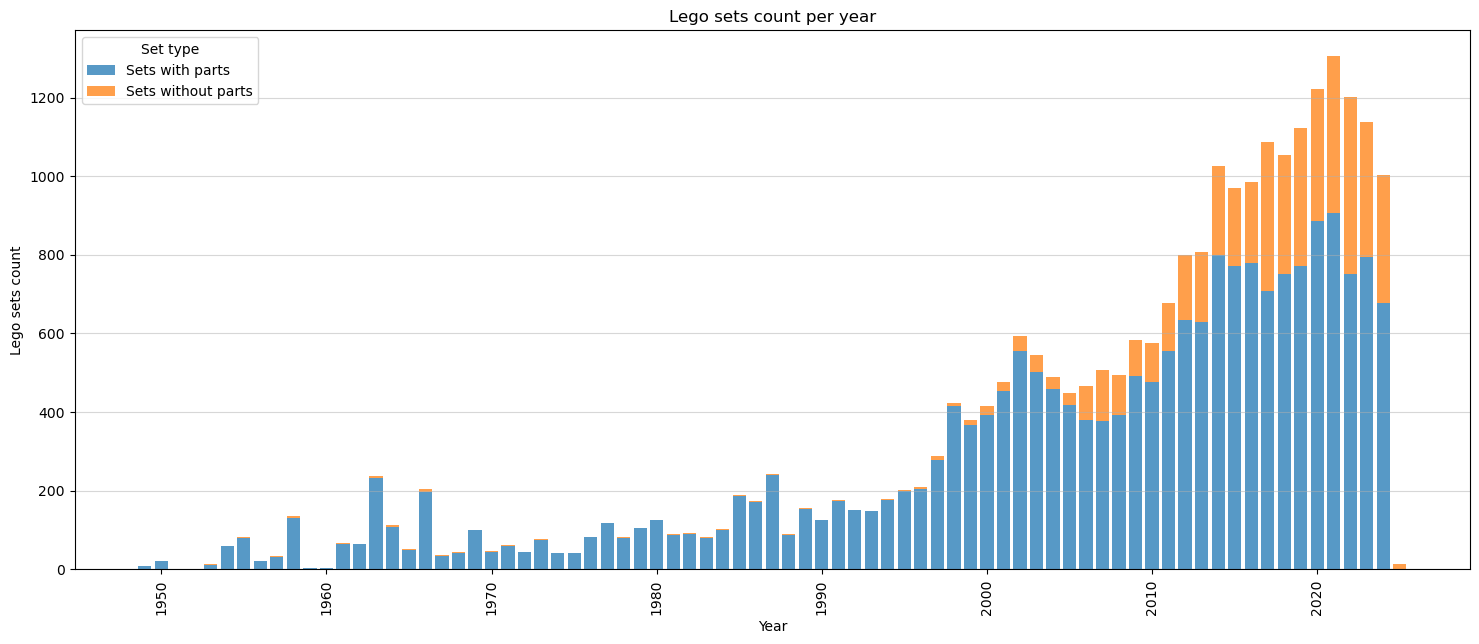

In [40]:
# how it looks with sets that do not have any parts
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
years_order = sorted(sets_tables_years_all['year'].unique())
plt.grid(axis='y', alpha=0.5)
ax.bar(sets_tables_years_all['year'], sets_tables_years_all['parts_in_set'], alpha=0.75, label='Sets with parts')
ax.bar(sets_tables_years_all['year'], sets_tables_years_all['without_parts_in_set'], bottom=sets_tables_years_all['parts_in_set'], alpha=0.75,  
      label='Sets without parts')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per year')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Year')
ax.legend(title='Set type')
plt.show()

For further analysis, I will exclude sets with no parts as they are not relevant - I focus only on regular sets, not on all products sold by Lego. From the chart above it is clear that through the years, more other stuff are sold/manufactured by Lego as this company increases its potential and influences other markets, not just staying in one.

In [41]:
# excluding rows containing sets with no parts
inventories_df = inventories_df[inventories_df['parts_in_set']]
inventories_df.shape

(20808, 15)

In [42]:
#  mean value per decade
sets_tables_decade_all = (inventories_df
                          .groupby('decade')
                          .agg(
                              no_of_years=('year', 'nunique'),
                              set_count=('set_num', 'count')
                          )
                          .reset_index()
                     )
sets_tables_decade_all['decade_avg'] = sets_tables_decade_all['set_count'] // sets_tables_decade_all['no_of_years']
sets_tables_decade_all

C:\Users\Dom\AppData\Local\Temp\ipykernel_16120\2722841704.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('decade')


,decade,no_of_years,set_count,decade_avg
0,1950,10,369,36
1,1960,10,934,93
2,1970,10,769,76
3,1980,10,1317,131
4,1990,10,2501,250
5,2000,10,4504,450
6,2010,10,7285,728
7,2020,4,3129,782


C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


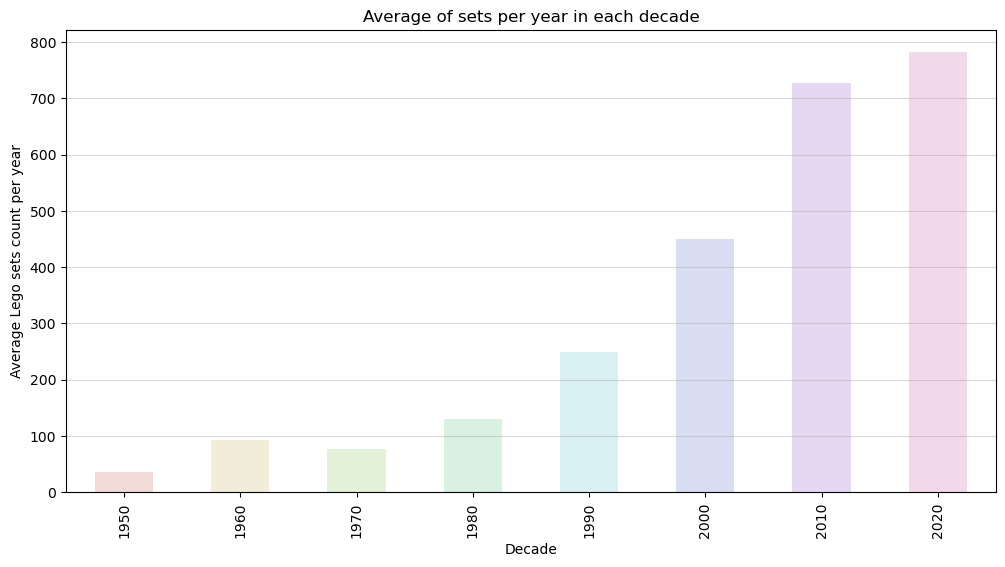

In [43]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_tables_decade_all, x='decade', y='decade_avg', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_tables_decade_all['decade']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Average of sets per year in each decade')
ax.set_ylabel('Average Lego sets count per year')
ax.set_xlabel('Decade')
plt.show()

In [44]:
print('Average number of Lego sets per year is:', int(sets_tables_years_all['parts_in_set'].mean()))

Average number of Lego sets per year is: 277


## QUESTION 2:
2. What is the average number of Lego parts per year? Per set per year and total bricks in all sets per year.


In [30]:
# check if minifigs parts are also in inventory parts
inventories_df.loc[inventories_df['set_num'] == 'fig-000555']

,inventory_id,version,set_num
16015,51370,1,fig-000555


In [31]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 51370]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
768290,51370,3626bpr0310,14,1,f,https://cdn.rebrickable.com/media/parts/photos...
768291,51370,4530,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
768292,51370,970c03,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
768293,51370,973c22h01pr0173,4,1,f,https://cdn.rebrickable.com/media/parts/photos...


So, to be sure and certain and well count the distinction between spares and normal parts I need to add this inventory to the summary.

In [33]:
# number of unique set number
inventories_df['set_num'].nunique()

38716

In [34]:
a = sets_table['set_num'].nunique()
a

23873

In [35]:
b = inventories_df.loc[inventories_df['set_num'].str.match('fig'), 'set_num'].nunique()

In [36]:
a + b

38716

In [42]:
inventories_df = inventories_df.merge(parts_per_inventory, on='inventory_id', how='left')
inventories_df.head()

,inventory_id,version,set_num,max_version,parts,spares
0,1,1,7922-1,1,5.0,0.0
1,3,1,3931-1,1,39.0,3.0
2,4,1,6942-1,1,16.0,1.0
3,15,1,5158-1,1,2.0,0.0
4,16,1,903-1,1,10.0,0.0


In [43]:
inventories_df.shape

(38716, 6)

In [44]:
inventory_minifigs_df_with_num_parts = inventory_minifigs_df.merge(inventories_df, left_on='fig_num', right_on='set_num')
inventory_minifigs_df_with_num_parts.head()

,inventory_id_x,fig_num,quantity,inventory_id_y,version,set_num,max_version,parts,spares
0,3,fig-001549,1,52364,1,fig-001549,1,4.0,0.0
1,4,fig-000764,1,51579,1,fig-000764,1,4.0,0.0
2,14589,fig-000764,1,51579,1,fig-000764,1,4.0,0.0
3,19,fig-000555,1,51370,1,fig-000555,1,4.0,0.0
4,25,fig-000574,1,51389,1,fig-000574,1,5.0,0.0


In [45]:
inventory_minifigs_df_with_num_parts['parts_total'] = inventory_minifigs_df_with_num_parts['quantity'] * inventory_minifigs_df_with_num_parts['parts']

In [46]:
inventory_minifigs_df_with_num_parts[inventory_minifigs_df_with_num_parts['spares'] != 0]

,inventory_id_x,fig_num,quantity,inventory_id_y,version,set_num,max_version,parts,spares,parts_total
16903,43641,fig-011590,1,106762,1,fig-011590,1,NaN,NaN,NaN


In [47]:
inventory_minifigs_df_with_num_parts.drop(columns=['inventory_id_y', 'set_num', 'max_version', 'parts', 'quantity', 'version', 'spares'], inplace=True)

In [48]:
inventory_minifigs_df_with_num_parts.rename(columns={'inventory_id_x': 'inventory_id'}, inplace=True)

In [49]:
inventory_minifigs_df_with_num_parts.head()

,inventory_id,fig_num,parts_total
0,3,fig-001549,4.0
1,4,fig-000764,4.0
2,14589,fig-000764,4.0
3,19,fig-000555,4.0
4,25,fig-000574,5.0


In [50]:
figs_per_inventory = pd.pivot_table(inventory_minifigs_df_with_num_parts, values='parts_total', index=['inventory_id'], \
                                     aggfunc=["sum", 'count'], fill_value=0).reset_index()
figs_per_inventory.head()

,inventory_id,sum,count
,,parts_total,parts_total
0,3,4.0,1
1,4,4.0,1
2,19,4.0,1
3,25,5.0,1
4,26,28.0,6


In [51]:
figs_per_inventory.columns = figs_per_inventory.columns.to_flat_index()
figs_per_inventory.columns

Index([('inventory_id', ''), ('sum', 'parts_total'), ('count', 'parts_total')], dtype='object')

In [52]:
figs_per_inventory.rename(columns={('inventory_id', ''): 'inventory_id', ('sum', 'parts_total'): 'fig_parts_sum', ('count', 'parts_total'): 'fig_count'}, inplace=True)
figs_per_inventory.head()

,inventory_id,fig_parts_sum,fig_count
0,3,4.0,1
1,4,4.0,1
2,19,4.0,1
3,25,5.0,1
4,26,28.0,6


In [53]:
inventories_df = inventories_df.merge(figs_per_inventory, on='inventory_id', how='left')
inventories_df.head()

,inventory_id,version,set_num,max_version,parts,spares,fig_parts_sum,fig_count
0,1,1,7922-1,1,5.0,0.0,NaN,NaN
1,3,1,3931-1,1,39.0,3.0,4.0,1.0
2,4,1,6942-1,1,16.0,1.0,4.0,1.0
3,15,1,5158-1,1,2.0,0.0,NaN,NaN
4,16,1,903-1,1,10.0,0.0,NaN,NaN


In [54]:
inventories_df.shape

(38716, 8)

In [55]:
inventory_parts_df.loc[(inventory_parts_df['inventory_id'] == 150237) & (inventory_parts_df['is_spare'] == 't')]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
1071444,150237,2447,47,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071446,150237,24866,30,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071469,150237,34172,15,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071475,150237,3673,14,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071500,150237,53119,70,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071507,150237,6141,46,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071512,150237,64567,0,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071525,150237,93160,15,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071529,150237,98138,33,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071530,150237,98138pr0056,84,1,t,https://cdn.rebrickable.com/media/parts/elemen...


Create a column that sums all parts together - classic + figures parts.

In [56]:
inventories_df['total_parts'] = inventories_df['parts'] + inventories_df['fig_parts_sum']

In [57]:
inventories_df.columns

Index(['inventory_id', 'version', 'set_num', 'max_version', 'parts', 'spares',
       'fig_parts_sum', 'fig_count', 'total_parts'],
      dtype='object')

Columns explanation in inventories_df: \
'inventory_id' - inventory id \
'version' - version of set \
'set_num' - set number\
'max_version' - max version of set, used for filter data, no needed, now we analyze only sets with highest possible version\
'parts' - parts count (excluded minifigures parts and spares)\
'spares' - spares count\
'fig_parts_sum' - count of parts for all minifigures added in the set\
'fig_count' - number of minifigures in the set\
'total_parts' - total number of parts (parts + fig_parts_sum), excludes number of spare parts\
Still need to add year of the set to the DataFrame.

In [58]:
sets_table.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [59]:
inventories_df[inventories_df['set_num'] == '0011-3']

,inventory_id,version,set_num,max_version,parts,spares,fig_parts_sum,fig_count,total_parts
1329,2216,1,0011-3,1,NaN,NaN,NaN,NaN,NaN


In [60]:
len(set(inventories_df['set_num']))

38716

In [61]:
len(set(sets_table['set_num']))

23873

In [62]:
inventories_df.drop(inventories_df[inventories_df['set_num'].str.match('fig')].index, axis=0, inplace=True)
inventories_df.shape

(23873, 9)

In [63]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventory_id   23873 non-null  int64  
 1   version        23873 non-null  int64  
 2   set_num        23873 non-null  object 
 3   max_version    23873 non-null  int64  
 4   parts          17793 non-null  float64
 5   spares         17793 non-null  float64
 6   fig_parts_sum  8284 non-null   float64
 7   fig_count      8284 non-null   float64
 8   total_parts    8056 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [64]:
inventories_df.fillna(0, inplace=True)
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventory_id   23873 non-null  int64  
 1   version        23873 non-null  int64  
 2   set_num        23873 non-null  object 
 3   max_version    23873 non-null  int64  
 4   parts          23873 non-null  float64
 5   spares         23873 non-null  float64
 6   fig_parts_sum  23873 non-null  float64
 7   fig_count      23873 non-null  float64
 8   total_parts    23873 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [65]:
inventories_df['total_parts'] = inventories_df['parts'] + inventories_df['fig_parts_sum']
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inventory_id   23873 non-null  int64  
 1   version        23873 non-null  int64  
 2   set_num        23873 non-null  object 
 3   max_version    23873 non-null  int64  
 4   parts          23873 non-null  float64
 5   spares         23873 non-null  float64
 6   fig_parts_sum  23873 non-null  float64
 7   fig_count      23873 non-null  float64
 8   total_parts    23873 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [66]:
inventories_df['parts'] = inventories_df['parts'].astype('int64')
inventories_df['spares'] = inventories_df['spares'].astype('int64')
inventories_df['fig_parts_sum'] = inventories_df['fig_parts_sum'].astype('int64')
inventories_df['fig_count'] = inventories_df['fig_count'].astype('int64')
inventories_df['total_parts'] = inventories_df['total_parts'].astype('int64')
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   version        23873 non-null  int64 
 2   set_num        23873 non-null  object
 3   max_version    23873 non-null  int64 
 4   parts          23873 non-null  int64 
 5   spares         23873 non-null  int64 
 6   fig_parts_sum  23873 non-null  int64 
 7   fig_count      23873 non-null  int64 
 8   total_parts    23873 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 1.8+ MB


In [67]:
inventories_df.drop(columns=['max_version'], inplace=True)
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   version        23873 non-null  int64 
 2   set_num        23873 non-null  object
 3   parts          23873 non-null  int64 
 4   spares         23873 non-null  int64 
 5   fig_parts_sum  23873 non-null  int64 
 6   fig_count      23873 non-null  int64 
 7   total_parts    23873 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.6+ MB


In [68]:
inventories_df.drop(columns=['version'], inplace=True)
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23873 entries, 0 to 38715
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   set_num        23873 non-null  object
 2   parts          23873 non-null  int64 
 3   spares         23873 non-null  int64 
 4   fig_parts_sum  23873 non-null  int64 
 5   fig_count      23873 non-null  int64 
 6   total_parts    23873 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [69]:
inventories_df.head()

,inventory_id,set_num,parts,spares,fig_parts_sum,fig_count,total_parts
0,1,7922-1,5,0,0,0,5
1,3,3931-1,39,3,4,1,43
2,4,6942-1,16,1,4,1,20
3,15,5158-1,2,0,0,0,2
4,16,903-1,10,0,0,0,10


<Axes: >

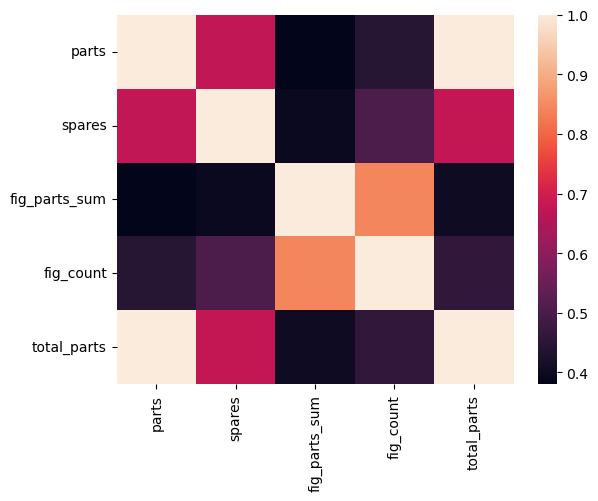

In [70]:
sns.heatmap(inventories_df[['parts', 'spares', 'fig_parts_sum', 'fig_count', 'total_parts']].corr())

<Axes: xlabel='total_parts', ylabel='spares'>

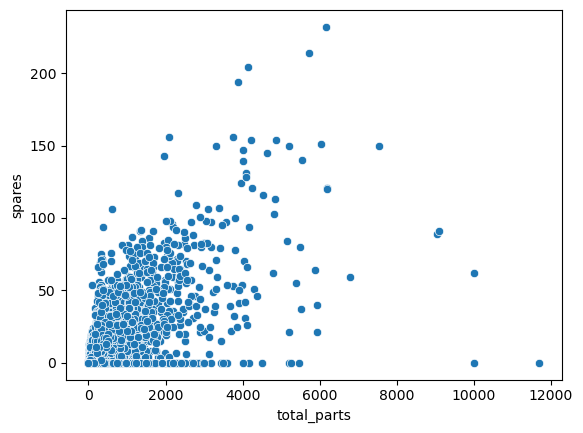

In [71]:
sns.scatterplot(data=inventories_df, x='total_parts', y='spares')

In [72]:
inventories_df['fig_count'].value_counts()

fig_count
0     15590
1      3948
2      1572
3      1062
4       644
5       377
6       256
7       142
8       103
9        57
10       25
12       18
11       18
13       13
14        9
15        9
22        6
21        4
16        3
19        3
18        3
28        2
25        2
17        1
31        1
29        1
69        1
23        1
24        1
20        1
Name: count, dtype: int64

In [73]:
inventories_df['parts'].value_counts()

parts
0       6094
1        786
2        660
3        511
4        400
        ... 
1127       1
2793       1
823        1
1959       1
2365       1
Name: count, Length: 1498, dtype: int64

In [74]:
inventories_df.loc[inventories_df['set_num'] == '60369-1'] # tractor : '60287-1' # Mobile Police Dog Training 60369

,inventory_id,set_num,parts,spares,fig_parts_sum,fig_count,total_parts
32240,150237,60369-1,188,10,9,2,197


In [75]:
inventories_year_df = inventories_df.merge(sets_table, on='set_num')
inventories_year_df.head()

,inventory_id,set_num,parts,spares,fig_parts_sum,fig_count,total_parts,name,year,theme_id,num_parts,img_url
0,1,7922-1,5,0,0,0,5,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,5,https://cdn.rebrickable.com/media/sets/7922-1.jpg
1,3,3931-1,39,3,4,1,43,Emma's Splash Pool,2012,494,43,https://cdn.rebrickable.com/media/sets/3931-1.jpg
2,4,6942-1,16,1,4,1,20,Zo Weevil,1999,134,20,https://cdn.rebrickable.com/media/sets/6942-1.jpg
3,15,5158-1,2,0,0,0,2,"T-Junction, Circle Plates",1990,443,2,https://cdn.rebrickable.com/media/sets/5158-1.jpg
4,16,903-1,10,0,0,0,10,Train Wheels and Couplers,1969,371,10,https://cdn.rebrickable.com/media/sets/903-1.jpg


In [76]:
inventories_year_df.drop(columns=['name', 'img_url'], inplace=True)
inventories_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inventory_id   23873 non-null  int64 
 1   set_num        23873 non-null  object
 2   parts          23873 non-null  int64 
 3   spares         23873 non-null  int64 
 4   fig_parts_sum  23873 non-null  int64 
 5   fig_count      23873 non-null  int64 
 6   total_parts    23873 non-null  int64 
 7   year           23873 non-null  int64 
 8   theme_id       23873 non-null  int64 
 9   num_parts      23873 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.8+ MB


In [77]:
inventories_year_df['diff'] = inventories_year_df['total_parts'] - inventories_year_df['num_parts']

In [78]:
inventories_year_df[inventories_year_df['diff'] != 0]

,inventory_id,set_num,parts,spares,fig_parts_sum,fig_count,total_parts,year,theme_id,num_parts,diff
1924,3156,1049-1,238,0,12,1,250,1985,507,238,12
2123,3484,557-1,721,4,8,2,729,1987,467,721,8
4063,6813,1589-2,247,4,16,2,263,1986,67,259,4
4097,6862,70818-1,165,10,32,5,197,2015,578,198,-1
4717,7901,3548-2,0,0,0,0,0,2003,459,3,-3
...,...,...,...,...,...,...,...,...,...,...,...
23107,233589,6527186-1,47,0,5,1,52,2024,749,47,5
23261,235781,892409-1,5,0,4,1,9,2024,435,5,4
23507,237019,75022-1,195,7,16,3,211,2013,158,195,16
23834,240921,9788325344535-1,3,0,5,1,8,2024,761,3,5


Need to further analyze carefully differences? Or stick to what I have counted? Or prepare charts for both perspectives? - to think\
Now let's take a look at a chart of mean parts value per set per year. Taking into consideration 'total_parts' columns.

In [79]:
data_for_chart = (inventories_year_df
                      .groupby('year')
                      .agg(
                          set_count=('total_parts', 'count'), 
                          parts_per_set_mean=('total_parts', 'mean')
                          )
                      .reset_index()
                      .sort_values(by='year')
                 )
data_for_chart.head()

,year,set_count,parts_per_set_mean
0,1949,5,99.600000
1,1950,6,1.000000
2,1953,4,12.500000
3,1954,14,8.357143
4,1955,39,12.205128


In [80]:
data_for_chart['parts_per_set_mean'] = data_for_chart['parts_per_set_mean'].astype('int64')
data_for_chart.head()

,year,set_count,parts_per_set_mean
0,1949,5,99
1,1950,6,1
2,1953,4,12
3,1954,14,8
4,1955,39,12


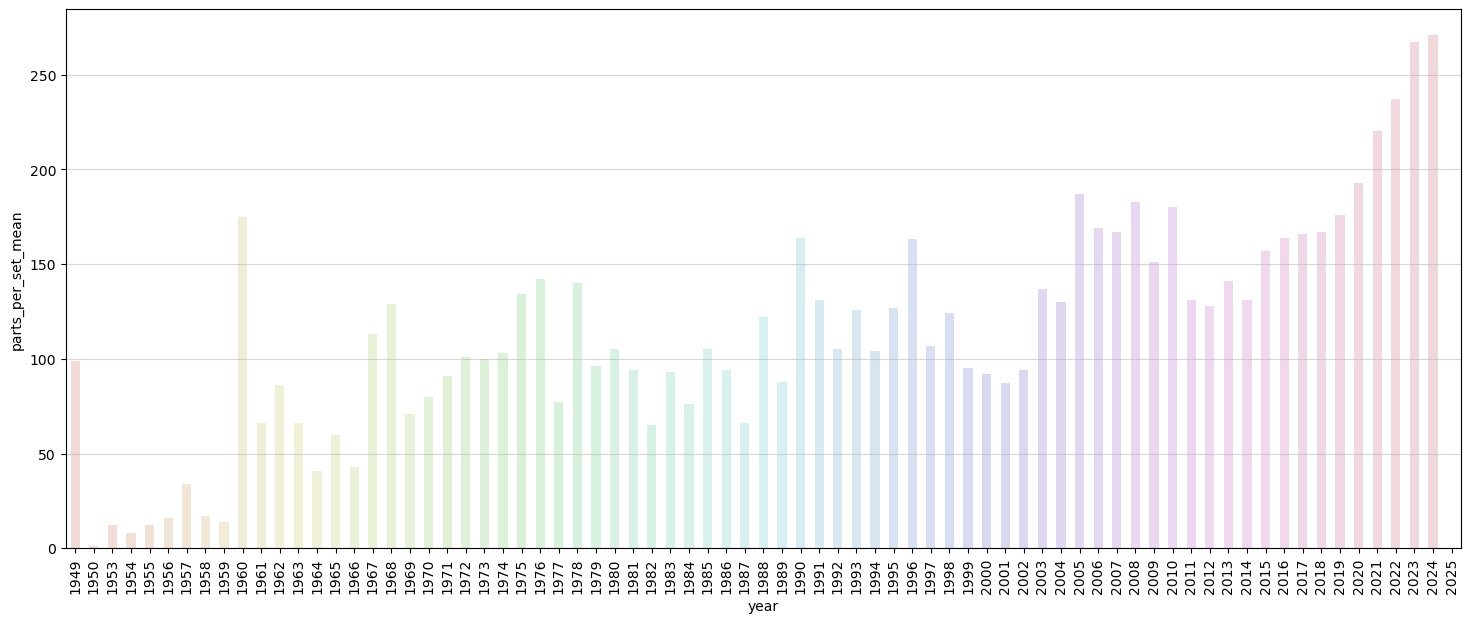

In [81]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = data_for_chart, x='year', y='parts_per_set_mean', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
#ax.set_title('Lego sets count per year')
#ax.set_ylabel('Lego sets count')
#ax.set_xlabel('Year')
plt.show()

# TODO
Now I need to add minifigs to the dataframe.

In [82]:
# TODO - fix table above -> first groupby inventory_id then merge with figs_quantity + first groupby figs quantity

In [83]:
part_cat_df = pd.read_csv('data\part_categories.csv.gz')
part_cat_df.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [84]:
inventory_parts_df = inventory_parts_df.merge(parts_df, on='part_num')

NameError: name 'parts_df' is not defined

In [ ]:
parts_per_set_year_df_3['difference'] = parts_per_set_year_df_3['Parts_Count'] - parts_per_set_year_df_3['num_parts']

In [ ]:
parts_per_set_year_df_3[parts_per_set_year_df_3['difference'] != 0]

In [ ]:
parts_per_set_year_df_3['difference'].describe()

In [ ]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.histplot(data = parts_per_set_year_df_3.loc[(parts_per_set_year_df_3['difference'] != 0) & (parts_per_set_year_df_3['num_parts'] != 0)], \
             x='difference', alpha=0.25, ax=ax, palette='hls') 
ax.set_title('Difference histogram')
ax.set_ylabel('Count')
ax.set_xlabel('Difference')
plt.show()

In [ ]:
parts_per_set_year_df_3.loc[parts_per_set_year_df_3['difference'] == 697]

In [ ]:
parts_per_set_year_df.info()

In [ ]:
np.sort(inventory_parts_df['part_num'].unique())

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1', 'quantity'].sum()

In [ ]:
sets_table.loc[sets_table['set_num'] == '60287-1']

In [ ]:
tractor_parts_desc = parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1'].merge(parts_df, on='part_num')
tractor_parts_desc

In [ ]:
tractor_parts_desc.drop(columns=['img_url', 'part_material'], inplace=True)
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc = tractor_parts_desc.merge(part_cat_df, left_on='part_cat_id', right_on='id')
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc.drop(columns=['part_cat_id', 'id'], inplace=True)
tractor_parts_desc.rename(columns={'name_x': 'part name', 'name_y': 'part category'}, inplace=True)
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc['part category'].unique()

In [ ]:
tractor_parts_desc.loc[tractor_parts_desc['part category'].isin(['Plants and Animals', 'Plates Round Curved and Dishes'])]

In [ ]:
inventory_minifigs_df.loc[inventory_minifigs_df['inventory_id'] == 80991]

In [ ]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '60287-1') & (parts_per_set_year_df['is_spare'] == 't'), 'is_spare'].count()

In [ ]:
sets_table.loc[(sets_table['set_num'] == '60287-1')]

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1', 'quantity'].sum()

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1']

In [ ]:
sets_table.loc[(sets_table['set_num'] == '10782-1')]

In [ ]:
inventories_df.loc[(inventories_df['set_num'] == '10782-1')]

In [ ]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '10782-1') & (parts_per_set_year_df['is_spare'] == 't')]

In [ ]:
parts_per_set_year_df = parts_per_set_year_df.merge(sets_table, on='set_num')

In [ ]:
parts_per_set_year_df.head()

## QUESTION 3:
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.


## QUESTION 4:
4. Figures: does Lego add now more figures to sets than in 1950? What are most common figures? How the number of figures changes? What are mean per set and total number of figures per year through time?

## QUESTION 5:
5. What are the 5 most popular colors used in Lego parts?


## QUESTION 6:
6. What proportion of Lego parts are transparent? What are most common transparent bricks? What are top 5 transparent colors? When first transparent bricks were used? What colors became transparent through time?



## QUESTION 7
7. What are the 5 rarest lego bricks?

## QUESTION 8:
8. What is the proportion of spare parts per set? Did it change through time?


## QUESTION 9:
9. Summarize your findings.